In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [26]:
#for the inbuild dataset
from sklearn.datasets import load_digits 
dataset=load_digits() 

In [27]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

* EDA
* Data Preprocessing
* Feature selection/Feature Extraction : **PCA LDA come in this stadge instead of FS/FE**
* Splitting of data(PCA doesn't need target variable)
* Model building (LReg, DTree, Rforest etc)
* Testing the model
* Evalution of Model

In [29]:
# this is data in dictionary format : {'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
#         [ 0.,  0.,  0., ..., 10.,  0.,  0.],
#         [ 0.,  0.,  0., ..., 16.,  9.,  0.],
#         ...,
#         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
#         [ 0.,  0.,  2., ..., 12.,  0.,  0.],
#         [ 0.,  0., 10., ..., 12.,  1.,  0.]]),

#target feature:  'target': array([0, 1, 2, ..., 8, 9, 8]),
#this data in dic format so we access it through "key"
dataset["data"]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [30]:
dataset["feature_names"] 

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [31]:
#getting data into dataframe table format but withouth feature name
df=pd.DataFrame(dataset["data"]) 
df 

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [32]:
df=pd.DataFrame(dataset["data"],columns=dataset["feature_names"])
df  
#now we get dataframe col with col name

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [33]:
dataset["target"]
#we have to predict target that is : is it pixel no. is 0 or 1 or ... or 8

array([0, 1, 2, ..., 8, 9, 8])

In [34]:
df=pd.DataFrame(dataset["data"]) 
df


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


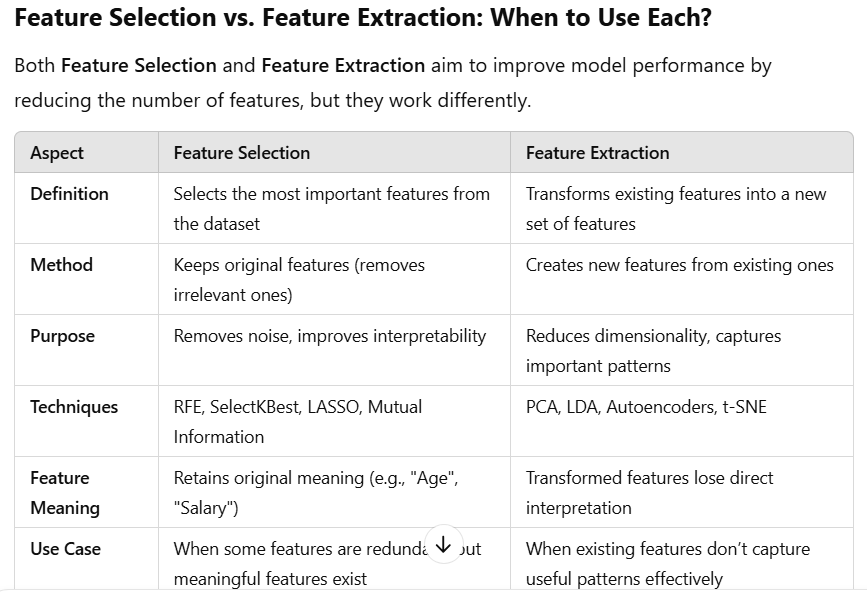
* 64 columns are too much causes to overfitting
* so we go for Feature extraction why i want to reduce column as well as i want to retreive info dont want to reduce info

* **When to Use Feature Extraction?**
* Many features are highly correlated, making selection difficult.
* When the number of features is much larger than the number of observations.
* Multiple features provide the same information in different ways.
* If no single feature is useful alone, transforming them into a new space might be better.
* When data has non-linear relationships that simple selection methods can't capture.
* 


    🔹 Use Feature Selection When:  
    
    1️⃣ When You Have Too Many Features (Curse of Dimensionality)
    Issue: High-dimensional data leads to overfitting and increased computational cost.
    Solution: Select the most important features to improve model performance.
    Example: A dataset with 10,000 features (e.g., genetic data) → Use Recursive Feature Elimination (RFE), LASSO, or SelectKBest.  
    
    2️⃣ When Features Are Irrelevant or Redundant
    Issue: Many features may not contribute to model performance.
    Solution: Remove redundant and non-informative features.
    Example:
    You have both "Age" and "Years Since Birth" → Drop one.
    A dataset has "Height in cm" and "Height in inches" → One is redundant.  
    
    3️⃣ When You Want to Improve Model Interpretability
    Issue: If a model uses too many features, it's difficult to interpret.
    Solution: Keep only meaningful features for better explainability.
    Example: In healthcare, keeping only blood pressure, cholesterol, and sugar levels makes a model easier to understand  
    
    4️⃣ When Training Time is Too High
    Issue: Models take too long to train due to high feature count.
    Solution: Select the most important features to speed up training.
    Example:
    In real-time applications (fraud detection, stock prediction), speed is critical.
    Removing unnecessary features makes models faster.  
    
    5️⃣ When Your Data Has Noise
    Issue: Some features may contain random noise rather than useful patterns.
    Solution: Feature selection removes noisy features to improve generalization.
    Example:
    In sensor data, some measurements might be fluctuating randomly → Use Mutual Information or LASSO to remove them.  


    📌 **Summary: When to Use Feature Selection?**
    ✅ Too many features (dimensionality reduction)
    ✅ Features are irrelevant or redundant
    ✅ Improve model interpretability
    ✅ Reduce training time
    ✅ Remove noise

In [37]:
len(dataset["target"])

1797

In [38]:
dataset["data"][0].reshape(8,8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

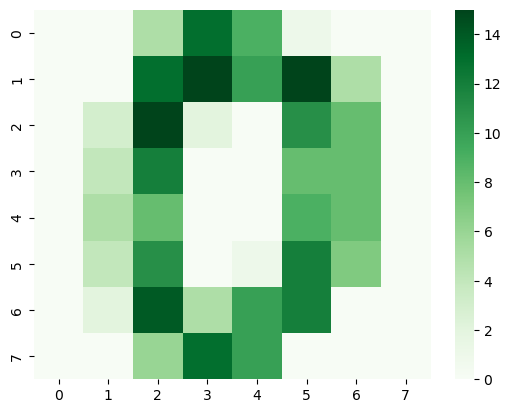

In [39]:
sns.heatmap(dataset["data"][0].reshape(8,8),cmap="Greens")
plt.show()
#reshape(8 col, 8 rows) it is standard size (8,8)

In [40]:
#in above image uses on 64pixels and image shows "0zero"

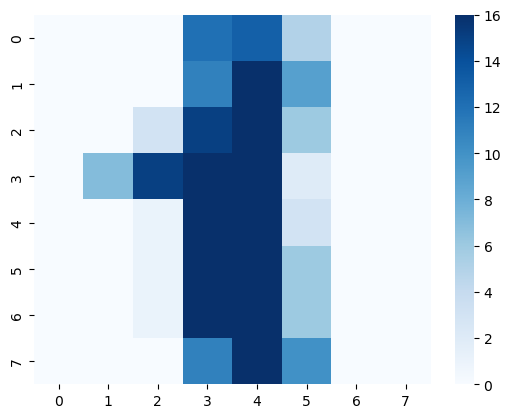

In [41]:
sns.heatmap(dataset["data"][1].reshape(8,8), cmap="Blues")
plt.show() 

In [42]:
#in above image uses on 64*64 pixels and image shows "1one"

In [43]:
dataset["target"]

array([0, 1, 2, ..., 8, 9, 8])

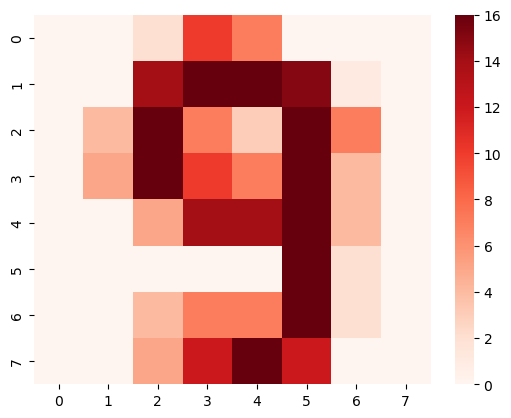

In [44]:
sns.heatmap(dataset["data"][-2].reshape(8,8), cmap="Reds")
plt.show() 

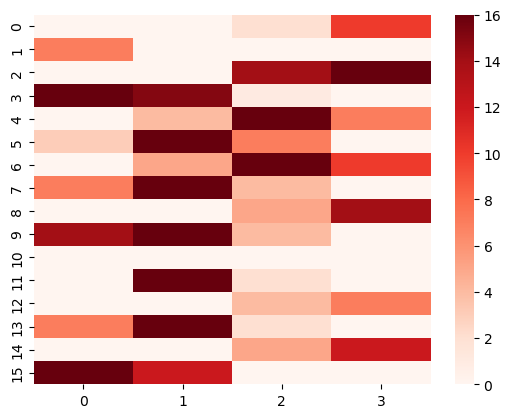

In [45]:
sns.heatmap(dataset["data"][-2].reshape(16,4), cmap="Reds")
plt.show() 
#image is streached ... we cant read this image (but machine can read)

* about dataset
- each row shows image (pixel image)  
- 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [48]:
df.isnull().sum()
#we dont have null values

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [49]:
df.duplicated().sum()
#zero duplicate found

0

**since we have large number of columns in the dataset thus we need to apply any dimensionality Reduction technique to overcome the problem of overfitting**


In [51]:
#splitting the data into independent and dependent
X=df
y=dataset["target"]

* feature selection/feature extraction
* VIF(Variance Inflation Factor), RFE(Recursive Feature Elimination (RFE)) etc (these techniques will be comple with such large number of columns also high chances of loosing info)
* we will go with feature extration to overcome this

#to find the optimal value of n_components
* step 1: standardize the data
* step 2: find covariance matrix
* step 3: find the eigen values and vetors from cov matrix
* sept 4: find the explained variance ration
* step 5: create a skree plot between the number of components and explained variance ratio

In [54]:
#step 1: standardize the data
from sklearn.preprocessing import StandardScaler  # ✅ Correct

sc = StandardScaler()
Scaled_X = sc.fit_transform(X)

    ## Why Standardize the Data in PCA?  
    
    PCA finds the directions of maximum variance, and if one feature has a larger scale than others, it will dominate the variance.
    Standardization ensures that all features contribute equally to PCA.
    Example: Problem Without Standardization
    Feature	Scale
    Height (cm)	150 - 180
    Weight (kg)	50 - 100
    Age (years)	20 - 50
    Here, Height and Weight have larger values than Age.
    PCA will consider these features more important just because of their scale.
    Standardization removes this bias by ensuring all features have mean = 0 and variance = 1.

In [56]:
Scaled_X=pd.DataFrame(Scaled_X, columns=X.columns)
Scaled_X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [57]:
#step 2: find covariance matrix : belong to Numpy library 
#we need feature in rows format so we have to convert column into rows 


# Eigenvectors : represent the directions (principal components) along which the data varies the most.
# Eigenvalues : indicate the amount of variance captured by each principal component.

    What is a Covariance Matrix?
    The covariance matrix measures the relationship between features (how they vary together). It tells us:
    
    Whether two features are positively correlated (increase together)
    Whether they are negatively correlated (one increases, the other decreases)
    Whether they are independent (no relationship)
    ***********************************************
    Why is Covariance Matrix Important in PCA?
    The covariance matrix helps find the directions of maximum variance.
    The eigenvectors of the covariance matrix give us the principal components.
    The eigenvalues tell us how much variance each component explains.  

    Understanding the Covariance Matrix Output
Let's say the covariance matrix looks like this:


1.00
0.89
0.75

0.89
1.00
0.68


0.75
0.68
1.00


 
Each value represents how two features vary together:

Diagonal values (1.00, 1.00, 1.00): Always 1 because features are standardized (variance = 1).
Off-diagonal values (0.89, 0.75, etc.): Represent correlation between features.  
0.89 → Strong positive correlation between Feature1 & Feature2.  
0.75 → Moderate positive correlation between Feature1 & Feature3.    
0.68 → Moderate positive correlation between Feature2 & Feature3.  

In [59]:
cov_mat=np.cov(Scaled_X.T)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [60]:
# Step 3 : Find the eigen values & vectors from Cov matrix

# Eigenvectors : represent the directions (principal components) along which the data varies the most.
# Eigenvalues : indicate the amount of variance captured by each principal component.

eig_val,eig_vec= np.linalg.eig(cov_mat)      

In [61]:
eig_val 

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.27692285, 0.05037444,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [62]:
eig_vec 

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

    How to Interpret This?
    The largest eigenvalue (7.34477606) corresponds to the first principal component (most variance).
    The second eigenvalue (5.83549054) corresponds to the second principal component (less variance).
    The smallest eigenvalue (5.15396118) corresponds to the third principal component (least variance, may be ignored).
    Each eigenvector represents a new axis in transformed space.

In [64]:
#step 4: find the explained variance ratio
(7.34477606/sum(eig_val))*100

12.03391609308772

In [65]:
total = sum(eig_val)
var_exp=[(i/total)*100 for i in sorted (eig_val, reverse=True)]
var_exp

[12.033916097734906,
 9.561054403097865,
 8.444414892624566,
 6.498407907524172,
 4.860154875966402,
 4.214119869271951,
 3.942082803567385,
 3.389380924638329,
 2.9982210116252355,
 2.932002551252223,
 2.7818054635503326,
 2.577055092581992,
 2.275303315764251,
 2.227179739514345,
 2.165229431849241,
 1.9141666064421363,
 1.775547085168197,
 1.6380692742844278,
 1.5964601688623445,
 1.4891911870878207,
 1.347969565817942,
 1.2719313702347528,
 1.1658373505919528,
 1.057646598536322,
 0.9753159471981119,
 0.944558989732,
 0.8630138269707247,
 0.8366428536685132,
 0.7976932484112434,
 0.7464713709260596,
 0.7255821513702724,
 0.6919112454811803,
 0.6539085355726157,
 0.6407925738459855,
 0.5913841117223418,
 0.5711624052235242,
 0.5236368034166365,
 0.48180758644514216,
 0.4537192598584475,
 0.42316275323278035,
 0.4060530699790376,
 0.39708480827582837,
 0.35649330314261757,
 0.34078718147029996,
 0.32783533528795405,
 0.31103200734535674,
 0.2885752941089337,
 0.2764892635235447,
 0.2

In [66]:
cum_var=np.cumsum(var_exp) #addition of cumulitive sum
cum_var

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

In [67]:
pd.DataFrame(cum_var).head(20) #still 79% info 

,0
0,12.033916
1,21.594971
2,30.039385
3,36.537793
4,41.397948
5,45.612068
6,49.554151
7,52.943532
8,55.941753
9,58.873755


#step 5: create a skree plot(combo of bar plot + step plot) between the number of components and explained variance ratio
#skree plot:  (combo of bar plot + step plot)


    The Scree Plot helps visualize the explained variance ratio of principal components. It helps determine the optimal number of components to keep.
    
    📌 Steps in Scree Plot Creation
    Extract the explained variance ratio from PCA.
    Plot a bar plot (to show explained variance per component).
    Overlay a step plot (cumulative variance) to show how much total variance is covered.*

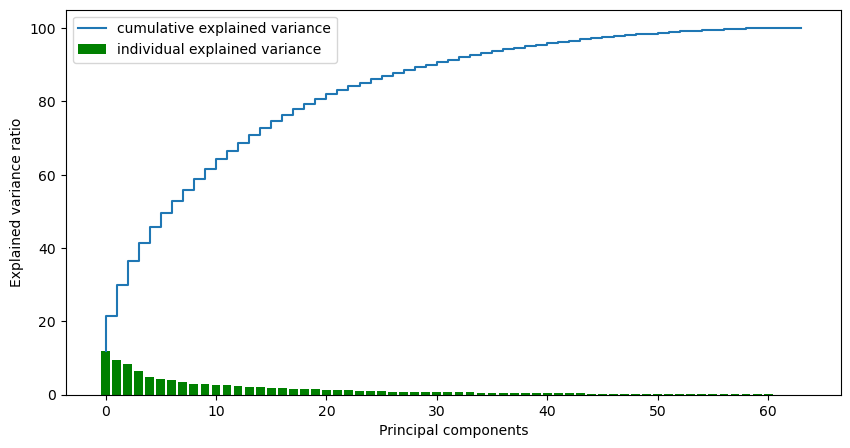

In [69]:

plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)),var_exp, label="individual explained variance",color = "g")
plt.step(range(len(cum_var)),cum_var, label="cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend()
plt.show()

#20 columns contain 80% info
#till 30 we get 90% info that really good .... after 30 no such diff found
#after 30 we just increasing ineffeient components/dimensions

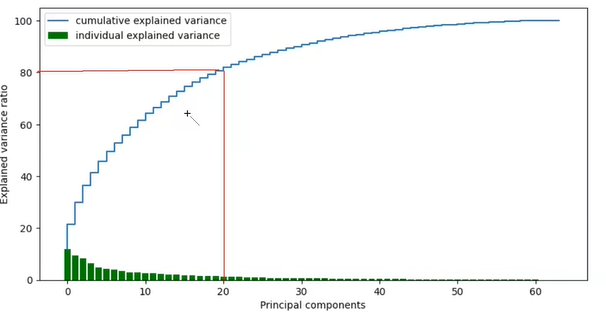

In [71]:
#from the above plot the n component 20 to 30 will give information of 80 to 90% thus take any values between that 
#lets take 25 

In [72]:
#lets perform PCA for reducing the dimension

from sklearn.decomposition import PCA 

In [73]:
pca_model=PCA (n_components=25)

In [74]:
pca_X=pca_model.fit_transform(Scaled_X) 
pca_X=pd.DataFrame(pca_X)
pca_X

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.914215,-0.954504,-3.946038,2.028753,-0.267119,0.530455,-1.415445,1.495886,0.125828,-0.821777,...,0.111043,0.188686,-0.086750,0.422551,0.429187,0.442379,0.536013,0.484628,-0.740851,-0.253363
1,0.588981,0.924642,3.924758,-1.779731,-0.993359,-0.675280,1.878687,0.556420,1.081325,0.088365,...,-0.197169,-0.098961,-0.418568,0.567483,-0.085422,0.889126,-0.266992,-0.521069,0.513108,1.154753
2,1.302036,-0.317178,3.023326,-2.043323,-2.081252,0.935097,-1.295795,1.156788,0.786180,-1.099100,...,0.406280,-0.247397,-0.472596,-1.061548,-1.141641,-0.550231,0.069215,-1.319630,-0.386654,-0.298765
3,-3.020769,-0.868776,-0.801742,-2.187060,-0.556762,0.727149,0.959592,-1.382660,0.258792,0.744218,...,-1.001596,-0.947086,-0.398506,1.487969,0.305809,0.565669,-0.154439,0.591078,-0.555508,-0.293132
4,4.528948,-1.093479,0.973122,-1.419523,-1.715143,1.431517,1.073700,-0.968170,-1.660443,1.174495,...,0.206208,-0.099345,-0.553634,1.612279,1.087887,0.504770,-0.179747,0.980584,-0.185149,-0.166801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104330,0.255033,-3.765860,-1.946923,-0.190138,-0.555598,0.531497,0.476823,1.153376,-0.472454,...,0.173074,0.499751,0.357100,-0.950545,0.807089,0.012452,-0.799467,-0.742673,-0.025721,-0.193226
1793,2.423233,-1.429604,-3.045237,2.632137,-0.822908,0.004149,-1.106602,2.330949,0.569220,-1.653910,...,1.102152,0.300129,-0.312484,-0.305920,0.099144,-0.975078,-0.061488,0.371284,0.082261,0.077624
1794,1.022597,-0.147920,2.469967,-0.620383,-0.972027,-0.007500,0.380797,0.528863,2.054389,-2.037385,...,1.155086,1.126884,0.669380,-1.615809,0.194519,0.186973,-0.215998,0.070492,0.221579,-0.718763
1795,1.076055,-0.380892,-2.455486,-1.311815,0.253558,-0.637811,1.034897,0.763755,1.079915,-0.333039,...,0.190000,1.685836,0.812612,-1.742117,0.749458,-0.193991,-0.505683,0.986679,0.353967,-0.261489


In [75]:
#OOOOOOOOOO#OR#RRRRRRRRRRRRRRRRRRRRR

In [76]:
pca_model=PCA (n_components=0.80)

In [77]:
pca_X=pca_model.fit_transform(Scaled_X) 


In [78]:
pca_X=pd.DataFrame(pca_X)

In [79]:
pca_X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.914214,-0.954502,-3.946035,2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,-0.789466,0.228125,-0.195142,0.837040,0.104341,0.185323,-0.090057,0.412754,0.430517,0.450994
1,0.588980,0.924636,3.924755,-1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,0.641593,-0.048361,-0.392054,-0.744412,-0.214072,-0.101727,-0.422000,0.553085,-0.069676,0.909818
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,-2.310276,-0.566874,-0.995772,-1.170505,0.399017,-0.240298,-0.465223,-1.065556,-1.133454,-0.525917
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,0.491755,-0.166579,1.008790,-0.141893,-1.000781,-0.950687,-0.400034,1.490825,0.308128,0.560421
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,-1.365994,-0.343716,-0.113469,0.732635,0.210692,-0.094411,-0.552371,1.613976,1.086368,0.495644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104331,0.255024,-3.765861,-1.947006,-0.190094,-0.555760,0.531222,0.476475,1.152430,-0.473054,...,0.803622,1.205195,-0.700724,0.187246,0.161669,0.504438,0.357642,-0.956725,0.816109,0.030250
1793,2.423234,-1.429611,-3.045245,2.632089,-0.822902,0.004061,-1.106872,2.330903,0.569455,-1.654173,...,-0.530551,0.858305,0.885069,-0.702222,1.098425,0.301699,-0.311522,-0.307535,0.110083,-0.957759
1794,1.022596,-0.147911,2.469974,-0.620307,-0.972043,-0.007377,0.381115,0.529064,2.054709,-2.036838,...,0.396803,-0.409313,0.257614,0.334953,1.162071,1.124031,0.669245,-1.612100,0.182303,0.166667
1795,1.076055,-0.380906,-2.455487,-1.312013,0.253533,-0.638322,1.034470,0.763325,1.077474,-0.334527,...,0.606451,0.169573,-0.759176,0.014572,0.158465,1.686638,0.811822,-1.769181,0.774718,-0.135668


**PCA implementation Done here!**

# Building the predictive model

### Implementing the decision tree


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [147]:
x_train,x_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.3,random_state=42)

In [84]:
dt_model = DecisionTreeClassifier()

In [149]:
#training of model
dt_model.fit(x_train, y_train) 

DecisionTreeClassifier()

In [151]:
# testing the model
y_pred = dt_model.predict(x_test) 

In [153]:
y_pred   #this is predicted value

array([6, 5, 3, 7, 2, 1, 5, 2, 5, 5, 1, 4, 7, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 9, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       1, 9, 3, 0, 6, 5, 9, 1, 8, 5, 6, 0, 2, 2, 0, 1, 9, 4, 5, 2, 4, 5,
       4, 0, 7, 9, 9, 9, 5, 7, 7, 0, 4, 5, 5, 0, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 9, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 8, 5, 9, 4, 2,
       7, 7, 4, 4, 4, 9, 2, 7, 9, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 5, 5,
       4, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 9, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 3, 2, 2, 5, 9, 8, 0, 3, 2, 9, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 3, 9, 4, 8, 1, 5, 4, 4, 9, 6, 7, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 6, 3, 2, 3, 6, 7, 9, 9, 1, 4, 7, 6, 8, 1, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 9, 3, 6, 0, 9, 7,
       9, 0, 1, 0, 4, 5, 8, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 9,

In [155]:
y_test   #this is actual value

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [157]:
from sklearn.metrics import *


In [159]:
accuracy_score(y_test,y_pred)

0.8518518518518519

# Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rf_model=RandomForestClassifier()  

In [168]:
#training the model
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [170]:
#testing of model
y_pred=rf_model.predict(x_test)

In [172]:
y_pred

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 9, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 9, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 2, 9, 3, 8, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [174]:
y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [192]:
accuracy_score(y_test,y_pred)

0.9592592592592593